In [79]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [40]:
from sklearn.datasets import load_boston
boston = load_boston()

In [41]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [42]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [43]:
data['PRICE'] = boston.target

In [44]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
data.shape

(506, 14)

In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [91]:
X = data.drop('PRICE', axis = 1)
y = data['PRICE']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [93]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
227,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36
464,7.83932,0.0,18.10,0.0,0.655,6.209,65.4,2.9634,24.0,666.0,20.2,396.90,13.22
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14
259,0.65665,20.0,3.97,0.0,0.647,6.842,100.0,2.0107,5.0,264.0,13.0,391.93,6.90


In [94]:
y_train.head()

348    24.5
227    31.6
464    21.4
156    13.1
259    30.1
Name: PRICE, dtype: float64

Линейная регрессия

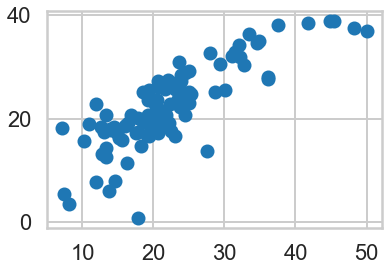

In [102]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.show()

In [100]:
lm.score(X, y)

0.7390532766217662

In [97]:
# среднеквадратичная ошибка
mse = sklearn.metrics.mean_squared_error(y_test, y_pred) 
print(mse)

23.067026735500473


In [104]:
# к. детерминации
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6741102827222237

In [106]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.557743972705601

SVR

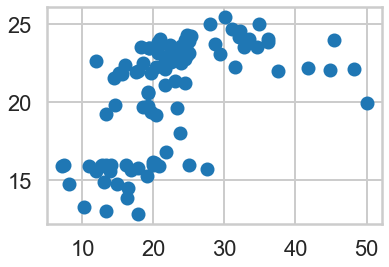

In [107]:
from sklearn.svm import SVR
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.scatter(y_test, y_pred)
plt.show()

In [108]:
clf.score(X,y) 
# без нормализации крайне низкние значения score

0.1993471735661545

In [109]:
sc = StandardScaler()
X_train_n = sc.fit_transform(X_train)
X_test_n = sc.transform(X_test)

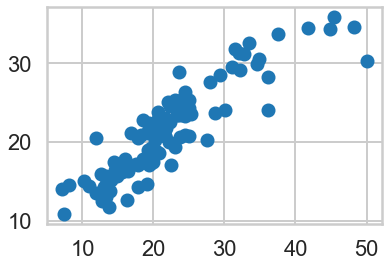

In [112]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)

clf.fit(X_train_n, y_train)

y_pred = clf.predict(X_test_n)

plt.scatter(y_test, y_pred)
plt.show()

In [115]:
clf.score(X_test_n,y_test)
# улучшения видны, в т.ч. графически

0.7509726408457028

In [116]:
# среднеквадратичная ошибка
mse = sklearn.metrics.mean_squared_error(y_test, y_pred) 
print(mse)

17.626578707259444


In [117]:
# к. детерминации
r2_score(y_test, y_pred)

0.7509726408457028

In [118]:
mean_absolute_error(y_test, y_pred)

2.7892952388022114

Вывод: по всем метрикам модель SVR лучше подходит для обучения по датасету